In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 29.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=08a4c0fab5d70434ea923dd44e6096e9442543da210d563da1dcd030a9ac9a94
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:

import nltk
from nltk.corpus import stopwords

import re
import pymorphy2

import itertools



import matplotlib.pyplot as plt
import seaborn as sns


import gensim
from gensim.models import CoherenceModel
import gensim.corpora as corpora
from tqdm import tqdm_notebook

import warnings

warnings.filterwarnings('ignore')

RAND = 10

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
dfcolumns = pd.read_csv('fu3.csv', nrows = 1, delimiter=';', encoding = 'UTF-8')

In [ ]:
df = pd.read_csv('fu3.csv',
                  header = None,
                  delimiter=';',
                  skiprows = 1,
                  encoding='UTF-8',
                  usecols = list(range(len(dfcolumns.columns))),
                  names = dfcolumns.columns)

In [ ]:
df['TEXT3'][0]

'блиндажный окопный свеча настоящий спасение тот оказываться экстремальный условие глава мо захаров вместе сотрудник мо остров декабрист учащийся кадетский класс юнармеец учитель гбоу сош василеостровский район спб заниматься изготовление именно такой свеча несколько день очень особенный каждый свеча который сделать надежда наш ребята полевой условие каждый свеча вкладывать забота тепло родной дом прокомментировать захаров каждый такой свеча способный обеспечивать освещение локальный обогрев рука протяжение часы также разогрев жидкость пища становиться решающий фактор критический ситуация каждый минута счет помнить наш защитник стараться сделать возможный помогать трудный момент человек который находиться зона специальный военный операция нуждаться наш поддержка забота именно поэтому хотеть передавать частичка тепло уют родной дом присоединяться проект тепло родной дом нужный помощь сво своихнебросать остров декабрист главамо теплородногодом дом администрация'

In [ ]:
X_train = df['TEXT3']
train_lst = X_train 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
print("Log Likelihood: ", lda_model_ben.score(train_vec_ben))
# Перплексия - сложность. чем ниже, тем лучше
print("Perplexity: ", lda_model_ben.perplexity(train_vec_ben))

Log Likelihood:  -14201279.95342938
Perplexity:  3945.3452266022155


In [ ]:
doc = train_lst

In [ ]:
# https://stackoverflow.com/questions/60613532/how-do-i-calculate-the-coherence-score-of-an-sklearn-lda-model

def get_coherence_mean(model, texts, n_top_words=20):
    """Получение средней оценки когерентности"""
    
    # кол-во тем
    topics = model.components_
    
    # получение токенов
    texts = [[word for word in doc.split()] for doc in texts]
    # создание словаря с использованием gensim
    dictionary = corpora.Dictionary(texts)

    # Корпус на основе матрицы подсчета слов
    corpus = [dictionary.doc2bow(text) for text in texts]

    feature_names = [dictionary[i] for i in range(len(dictionary))]

    # Получение ТОП-слов для каждой темы
    top_words = []
    for topic in topics:
        top_words.append(
            [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

    coherence_model = CoherenceModel(topics=top_words,
                                     texts=texts,
                                     dictionary=dictionary,
                                     coherence='c_v')
    coherence = coherence_model.get_coherence()
    return coherence

In [ ]:
texts = [[word for word in doc.split()] for doc in train_lst]
dictionary = corpora.Dictionary(texts)

In [ ]:
get_coherence_mean(lda_model_ben, train_lst)

0.6920033378538908

In [ ]:
def compute_coherence_values(vec_train_text,
                             test_text,
                             min_topic=2,
                             max_topic=40,
                             step=5):
    """Вычисление оценок в зависимости от кол-ва тематик"""
    
    coherence_values = []
    model_list = []

    for num_topics in tqdm_notebook(range(min_topic, max_topic, step)):
        model = LatentDirichletAllocation(
            max_iter=10,
            n_components=num_topics,
            learning_method='online',
            random_state=RAND,
            n_jobs=-1,
        )
        model.fit(vec_train_text)

        model_list.append(model)
        coherence_values.append(get_coherence_mean(model, test_text))

    return model_list, coherence_values

In [ ]:
min_topic = 12
max_topic = 15
step = 1

model_list, coherence_values = compute_coherence_values(vec_train_text=train_vec_ben,
                                                        test_text=train_lst,
                                                        min_topic=min_topic,
                                                        max_topic=max_topic,
                                                        step=step)

  0%|          | 0/3 [00:00<?, ?it/s]

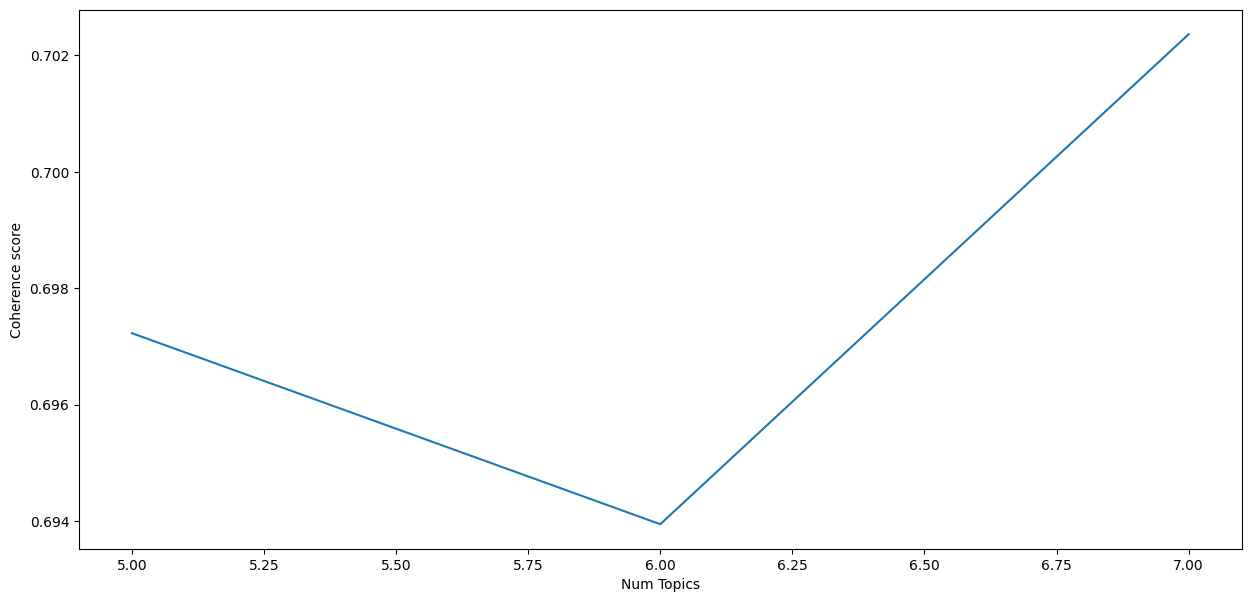

In [ ]:
x = range(min_topic, max_topic, step)

plt.figure(figsize=(15, 7))

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")

plt.show()

In [ ]:
for n_topics, coherence in zip(x, coherence_values):
    print(f"Num Topics = {n_topics}, Coherence = {coherence:.3f}")

Num Topics = 5, Coherence = 0.697
Num Topics = 6, Coherence = 0.694
Num Topics = 7, Coherence = 0.702


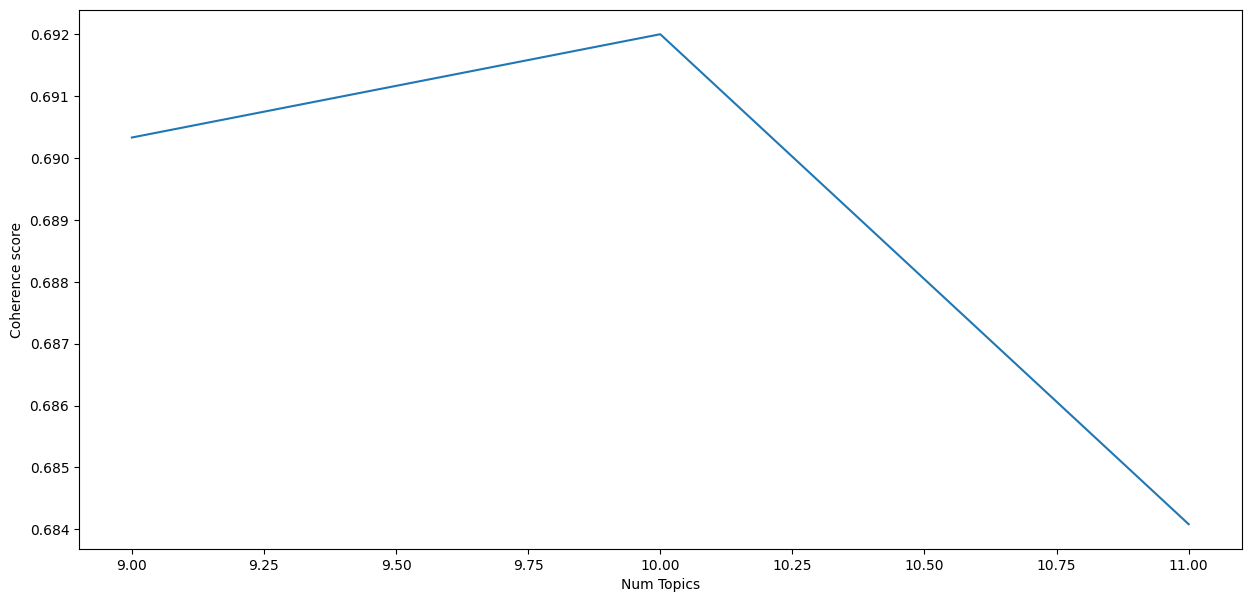

In [ ]:
x = range(min_topic, max_topic, step)

plt.figure(figsize=(15, 7))

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")

plt.show()

In [ ]:
for n_topics, coherence in zip(x, coherence_values):
    print(f"Num Topics = {n_topics}, Coherence = {coherence:.3f}")

Num Topics = 9, Coherence = 0.690
Num Topics = 10, Coherence = 0.692
Num Topics = 11, Coherence = 0.684


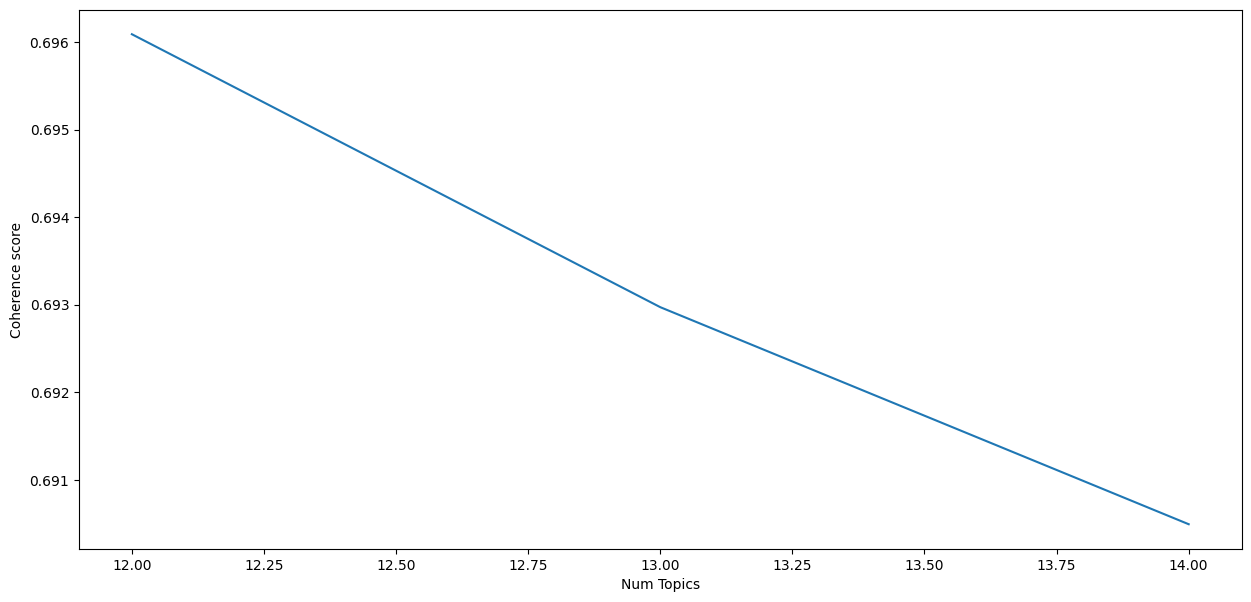

In [ ]:
x = range(min_topic, max_topic, step)

plt.figure(figsize=(15, 7))

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")

plt.show()

In [ ]:
for n_topics, coherence in zip(x, coherence_values):
    print(f"Num Topics = {n_topics}, Coherence = {coherence:.3f}")

Num Topics = 12, Coherence = 0.696
Num Topics = 13, Coherence = 0.693
Num Topics = 14, Coherence = 0.690


In [ ]:
get_coherence_mean(lda_model_ben, train_lst)

0.7007253620016911

In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
def preprocess_text(data, stopwords='/content/drive/MyDrive/диплом/stopwords.txt'):
    """Очистка текста и удаление стоп-слов"""

    text = re.sub('ё', 'е', data.lower())
    # добавляем пробелы между знаками препинания
    text = re.sub(r"([.,!?])", r" \1 ", text)
    # убираем лишние символы, оставляем буквы, пробелы и зн.пр.
    text = re.sub(r"[^а-яА-Я\s]+", "", text)
    # удаляем пробелы в начале и в конце предложения
    text = text.strip()
    # удаление стоп-слов
    text = [w for w in text.split() if w not in stopwords]
    # удаляем слова короче 3х символов
    text = [w for w in text if len(w) >= 3]
    return ' '.join(text)


def lemmatization_text(data, morph=morph):
    """Приведение слов к нормальной форме"""
    
    result = ' '.join([morph.parse(x)[0].normal_form for x in data.split()])
    result = ' '.join(
        [x for x in result.split() if x not in ['монитор', 'экран', 'очень']])
    return result


def get_result(data, morph=morph, stopwords='/content/drive/MyDrive/диплом/stopwords.txt'):
    """
    Объединение очистки текста, приведения слов 
    к нормальной форме и токенизации
    """

    if data is not np.NaN:
        result = preprocess_text(data=data)
        result = lemmatization_text(result)
        result = result.replace('больший', 'большой')
        return result
    return ''

In [ ]:
def transform_data(data: pd.Series) -> list:
    transform_lst = [get_result(data=i) for i in data]
    transform_lst = [x for x in transform_lst if x not in [None, '']]
    return transform_lst


# обработка положительных отзывов
train_lst = transform_data(X_train)

In [ ]:
train_lst[:3]

['блиндажный окопный свеча настоящий спасение тот оказываться экстремальный условие глава захаров вместе сотрудник остров декабрист учиться кадетский класс юнармеец учитель гбоу сош василеостровский район спб заниматься изготовление именно такой свеча несколько день особенный каждый свеча который сделать надежда наш ребята полевой условие каждый свеча вкладывать забота тепло родный дом прокомментировать захаров каждый такой свеча способный обеспечивать освещение локальный обогрев рука протяжение часы также разогреть жидкость пища становиться решающий фактор критический ситуация каждый минута счёт помнить наш защитник стараться сделать возможный помогать трудный момент человек который находиться зона специальный военный операция нуждаться наш поддержка забота именно поэтому хотеть передавать частичка тепло уют родный дом присоединяться проект тепло родный дом нужный помощь сво своихнебросать остров декабрист главамо теплородногод дом администрация',
 'восхитительный вид успенский церков

In [ ]:
# Подсчитаем кол-во слов в предложениях (составление терм-документной матрицы)
vector_ben = CountVectorizer(
    analyzer='word',
    # min_df - частота встречаемого термина < 10
    min_df=10,
    # биграммы, триграммы
    ngram_range=(1, 1),
    stop_words=stopwords.words("russian"))
train_vec_ben = vector_ben.fit_transform(train_lst)

In [ ]:
vector_ben.get_feature_names_out()

array(['абзац', 'абитуриент', 'абонемент', ..., 'ёлочка', 'ёлочный',
       'ёмкость'], dtype=object)

In [ ]:
texts = [[word for word in doc.split()] for doc in train_lst]
dictionary = corpora.Dictionary(texts)

In [ ]:
# Модель латентного размещения Дирихле
lda_model_ben = LatentDirichletAllocation(
    # кол-во тем
    n_components=10,
    max_iter=15,
    learning_method='online',
    random_state=RAND,
    n_jobs=-1,
)
lda_model_ben.fit(train_vec_ben)
print(lda_model_ben)

LatentDirichletAllocation(learning_method='online', max_iter=15, n_jobs=-1,
                          random_state=10)


In [ ]:
train_vec_ben[0]

<1x13536 sparse matrix of type '<class 'numpy.int64'>'
	with 87 stored elements in Compressed Sparse Row format>

In [ ]:
# https://stackoverflow.com/questions/60613532/how-do-i-calculate-the-coherence-score-of-an-sklearn-lda-model

def get_coherence_mean(model, texts, n_top_words=20):
    """Получение средней оценки когерентности"""
    
    # кол-во тем
    topics = model.components_
    
    # получение токенов
    texts = [[word for word in doc.split()] for doc in texts]
    # создание словаря с использованием gensim
    dictionary = corpora.Dictionary(texts)

    # Корпус на основе матрицы подсчета слов
    corpus = [dictionary.doc2bow(text) for text in texts]

    feature_names = [dictionary[i] for i in range(len(dictionary))]

    # Получение ТОП-слов для каждой темы
    top_words = []
    for topic in topics:
        top_words.append(
            [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

    coherence_model = CoherenceModel(topics=top_words,
                                     texts=texts,
                                     dictionary=dictionary,
                                     coherence='c_v')
    coherence = coherence_model.get_coherence()
    return coherence

In [ ]:
get_coherence_mean(lda_model_ben, train_lst)

0.6705352436318833

In [ ]:
def predict_topic(data, vectorizer=vector_ben, model=lda_model_ben):
    
    transform_text = get_result(data)
    vec_text = vectorizer.transform([transform_text])
    topic_proba = model.transform(vec_text)[0]
    
    if np.all(topic_proba == topic_proba[0]) == True:
        return -9
    return np.argmax(topic_proba)

In [ ]:
df['top_topic'] = df.TEXT3.transform(predict_topic)

In [ ]:
df[:5]

,ID,TYPE,SUBTYPE,FOLLOWERS,SIMILAR_AUTHOR,DATE,TIME,LIKES,REPOSTS,COMMENTS,...,EMOTIONALITY_FULL,INTONATION_COMMENT,INTONATION_POST,INTONATION_FULL,IMPERATIV_POST,TIME_MIDNIGHT,FUNCTION2,TSC_3988,REG,top_topic
0,4975,official,muni,6336,1,04.04.2023,12:00:00,2083,1548,16,...,",395933473646641",",168000473006278",",000785545954438335",",0843930094803583",",000785545954438335",720,1,1,1,7
1,17815,public,dist,2405,1,17.04.2023,17:20:00,1202,79,30,...,",168071349978447",",0307668159112038",0,",0153834079556019",0,1040,1,1,1,7
2,17143,public,deput,323,1,23.01.2023 11:11,11:11:00,131,0,15,...,",072300602287054",",25536825696046",",0032258064516129",",129297031706036",0,671,1,1,1,8
3,17114,public,deput,323,1,21.03.2023 16:42,16:42:00,103,11,3,...,",238079427540303",",69700490655734",",000930232558139535",",34896756955774",0,1002,1,1,1,8
4,17209,public,deput,323,1,03.11.2022 19:09,19:09:00,122,3,1,...,",249305821067698",,",00500834724540902",,0,1149,1,1,1,7


In [ ]:
df.to_csv('topics.csv', sep=';', encoding='utf-8')

In [ ]:
from google.colab import files
files.download('topics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def show_topics(vectorizer, model, n_words=20):
    feature_names = np.array(vectorizer.get_feature_names_out())
    top_words = []
    
    # проходимся по каждой теме
    for topic_weights in model.components_:
        # сортируем веса по убыванию (для каждого слова из словаря) и берем ТОП-N слов
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        # берем id ТОП слов из словаря (согласно весам)
        top_words.append(feature_names.take(top_keyword_locs))
        
    return top_words

In [ ]:
topic_keywords = show_topics(vectorizer=vector_ben,
                             model=lda_model_ben,
                             n_words=1000)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = [
    'Word ' + str(i) for i in range(df_topic_keywords.shape[1])
]
df_topic_keywords.index = [
    'Topic ' + str(i + 1) for i in range(df_topic_keywords.shape[0])
]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 990,Word 991,Word 992,Word 993,Word 994,Word 995,Word 996,Word 997,Word 998,Word 999
Topic 1,добрый,собака,дом,сосед,пожалуйста,находить,вечер,кот,искать,видеть,...,скворцовый,молния,йог,относить,недостаточность,луговой,промах,откладывать,пальто,шоколадка
Topic 2,район,площадка,благоустройство,адрес,работа,житель,детский,территория,сад,калининский,...,плодородный,лимитировать,открыть,дно,бычок,сумерки,развод,бронировать,чемодан,май
Topic 3,год,петербург,город,проект,рубль,намыв,который,новый,строительство,остров,...,эффективность,одобрять,взяться,предел,делать,воздух,пропаганда,присутствовать,масштабный,электрический
Topic 4,дом,петербург,район,работа,территория,комитет,вопрос,житель,который,гражданин,...,показание,инициировать,застава,ржа,фиксировать,возрождение,получить,перевод,алгоритм,поддержание
Topic 5,центр,помощь,услуга,совет,внимание,район,житель,спб,телефон,объявление,...,опрашивать,закрывать,соответствовать,занятый,последующий,исключение,верный,созыв,обеспечивать,годовой
Topic 6,улица,проспект,вода,район,дом,калининский,работа,снег,врач,уборка,...,рыбный,протекать,мохов,стоянка,обильный,большинство,равно,изменение,детишки,протяжение
Topic 7,мужчина,летний,полиция,дело,женщина,сотрудник,район,девочка,год,место,...,убить,описание,ноготь,юность,дядя,выход,нажать,условно,заявить,лента
Topic 8,свой,наш,который,человек,ребёнок,самый,день,время,весь,хотеть,...,отказываться,сдаваться,пояс,жениться,диск,снимка,орать,ужин,славянин,открыто
Topic 9,год,школа,район,конкурс,поздравлять,россия,калининский,образование,место,участие,...,салют,справедливый,профсоюз,классический,нагрудный,хореография,министр,подарить,учреждать,незабываемый
Topic 10,год,улица,петербург,город,автобус,метро,проспект,станция,война,площадь,...,прочность,носить,утренний,сочетание,карла,официально,продлить,япония,пятый,лампочка


In [ ]:
df_topic_keywords.to_csv('top10.csv', sep=';', encoding='utf-8')

In [ ]:
files.download('top10.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

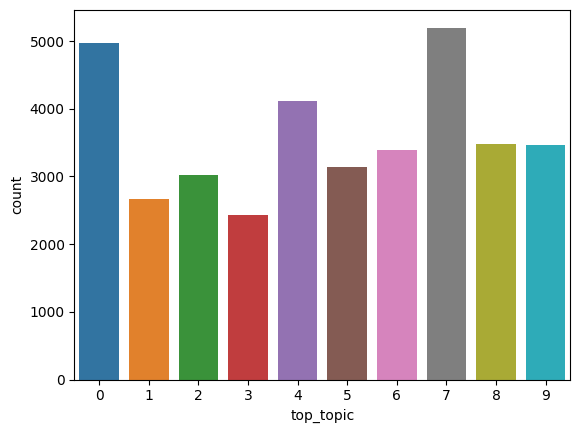

In [ ]:
sns.countplot(x='top_topic', data=df[df.top_topic != -9]);

In [ ]:
from __future__ import division

import graphlab as gl
import pandas as pd
import pyLDAvis
import pyLDAvis.graphlab

pyLDAvis.enable_notebook()

topic_model = gl.topic_model.create(bows, num_topics=100, num_iterations=200)

In [ ]:
p = pyLDAvis.gensim.prepare(topic_model, corpus, dictionary)
pyLDAvis.save_html(p, 'lda.html')

In [ ]:
def predict_topic(data, vectorizer=vector_ben, model=lda_model_ben):
    
    transform_text = get_result(data)
    vec_text = vectorizer.transform([transform_text])
    topic_proba = model.transform(vec_text)[0]
    
    if np.all(topic_proba == topic_proba[0]) == True:
        return -9
    return np.argmax(topic_proba)

In [ ]:
df['top_topic'] = df.ТЕКСТ3.transform(predict_topic)

In [ ]:
sns.countplot(x='top_topic', data=df[df.top_topic != -9]);

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
datatext = df['TEXT3'].loc[df['top_topic'] == -9]

In [ ]:
data_text = list(datatext)

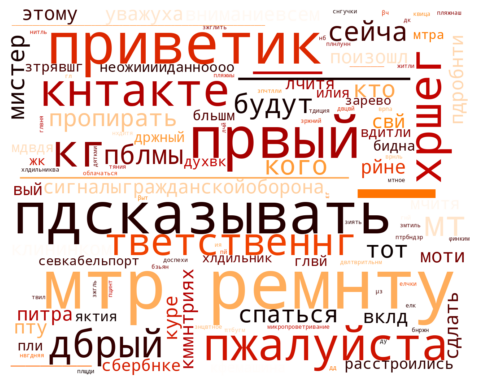

In [ ]:
text = " ".join(i for i in data_text)
stopwords = set(STOPWORDS)
stopwords.update(["очень", "маршрут", "место", "проходить", "первый", "здание", "становиться", "дом", "время", "такой", "просто", "наш", "каждый", "человек", "свой", "город", "утро", "вода", "житель", "новый", "весь", "день", "улица", "район", "калининский", "добрый", "вопрос", "работа", "который", "год", "году", "также", "петербург", "петербурге", "петербурга", "которые"])
wordcloud = WordCloud(stopwords=stopwords, width=1280,
                        height=1024, background_color="white", colormap = 'gist_heat').generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
width=800,
                        height=600